# PM2D - 2D Panel Method Documentation

## Author: Damyn Chipman

PM2D is a 2D Panel Method package. The panel method employs potential flow theory to solve for element strengths of singularity elements distributed along a body (such as an airfoil). The tangent flow boundary conditions are imposed on collocation points distributed along the body. A physical Kutta condition is also imposed to ensure that the airflow at the trailing edges leaves smoothly.

The Hess-Smith method for element distribution is used. The body has a constant source distribution with varying strengths at each panel as well as a constant vortex distribution with a single vortex strength for each panel. This allows for easy implementation of the Kutta condition by introducing one more unknown strength to solve for than panels.

## Background

The panel method uses integral solutions to Laplace's equation to solve for the velocity potential. We assume incompressible, irrotational flow around a solid body. Any velocity can be broken into two contributions, from the free-stream and from the influence of the body. 

The theory for the Panel Method stems from Potential Flow theory. For an incompressible, steady state, irrotational fluid, the continuity equation becomes:

\begin{equation}
\dfrac{\partial u_x}{\partial x} + \dfrac{\partial u_y}{\partial y} + \dfrac{\partial u_z}{\partial z} = \nabla \textbf{u} = 0
\end{equation}

By allowing the velocity to be the gradient of some potential flow $\phi$ we obtain Laplace's equation:

\begin{equation}
\nabla^2 \phi = 0
\end{equation}

The tangent flow and Kutta Conditions are as follows:

$$ 1. \ \ \  \textbf{u}_P \cdot \hat{\textbf{n}} = (\textbf{u}_{\phi} + \textbf{u}_{\infty}) \cdot \hat{\textbf{n}} = 0 $$
$$ 2. \ \ \ \textbf{u}_1 \cdot \hat{\textbf{t}}_1 + \textbf{u}_N \cdot \hat{\textbf{t}}_N = (\textbf{u}_{\phi,1} + \textbf{u}_{\infty}) \cdot \hat{\textbf{t}}_1 + (\textbf{u}_{\phi,N} + \textbf{u}_{\infty}) \cdot \hat{\textbf{t}}_N = 0 $$

Discretizing the above yields:

$$ 1. \ \ \  (\textbf{u}_{\phi} + \textbf{u}_{\infty}) \cdot \hat{\textbf{n}} = (\sum_{j=1}^N \sigma_j \textbf{u}_{Source,ij} + \Gamma \sum_{j=1}^N \textbf{u}_{Vortex,ij} + \textbf{u}_{\infty}) \cdot \hat{\textbf{n}}_i = 0 $$
$$ 2. \ \ \  (\sum_{j=1}^N \sigma_j \textbf{u}_{S,1j} + \Gamma \sum_{j=1}^N \textbf{u}_{V,1j} + \textbf{u}_{\infty}) \cdot \hat{\textbf{t}}_1 + (\sum_{j=1}^N \sigma_j \textbf{u}_{S,Nj} + \Gamma \sum_{j=1}^N \textbf{u}_{V,Nj} + \textbf{u}_{\infty}) \cdot \hat{\textbf{t}}_N = 0  $$

where after a transformation from global to panel coordinates:

$$ \textbf{u}_{Source,ij} = [\dfrac{1}{4 \pi} log(\dfrac{(x_i - L_j)^2 + y_i^2}{x_i^2 + y_i^2}), -\dfrac{1}{2 \pi} ({tan}^{-1}(\dfrac{y_i}{x_i - L_j}) - {tan}^{-1}(\dfrac{y_i}{x_i}))] $$

$$ \textbf{u}_{Vortex,ij} = [-\dfrac{1}{2 \pi} ({tan}^{-1}(\dfrac{y_i}{x_i - L_j}) - {tan}^{-1}(\dfrac{y_i}{x_i})), -\dfrac{1}{4 \pi} log(\dfrac{(x_i - L_j)^2 + y_i^2}{x_i^2 + y_i^2})] $$

By splitting each piece up into matrix entries, we get the following matrix equation:

$$ A \textbf{x} = \textbf{b} $$

where:

\begin{equation*}
A = \begin{bmatrix}
\textbf{u}_{S,11} \cdot \hat{\textbf{n}}_1 & \textbf{u}_{S,12} \cdot \hat{\textbf{n}}_1 & \ldots & \textbf{u}_{S,1N} \cdot \hat{\textbf{n}}_1 & (\textbf{u}_{V,11} + \textbf{u}_{V,12} + \ldots + \textbf{u}_{V,1N}) \cdot \hat{\textbf{n}}_1 \\
\textbf{u}_{S,21} \cdot \hat{\textbf{n}}_2 & \textbf{u}_{S,22} \cdot \hat{\textbf{n}}_2 & \ldots & \textbf{u}_{S,2N} \cdot \hat{\textbf{n}}_2 & (\textbf{u}_{V,21} + \textbf{u}_{V,22} + \ldots + \textbf{u}_{V,2N}) \cdot \hat{\textbf{n}}_2 \\
\vdots &  \vdots & \ddots & \vdots & \vdots \\
\textbf{u}_{S,N1} \cdot \hat{\textbf{n}}_N & \textbf{u}_{S,N2} \cdot \hat{\textbf{n}}_N & \ldots & \textbf{u}_{S,NN} \cdot \hat{\textbf{n}}_N & (\textbf{u}_{V,N1} + \textbf{u}_{V,N2} + \ldots + \textbf{u}_{V,NN}) \cdot \hat{\textbf{n}}_N \\
\textbf{u}_{S,11} \cdot \hat{\textbf{t}}_1 + \textbf{u}_{S,N1} \cdot \hat{\textbf{t}}_N & \textbf{u}_{S,12} \cdot \hat{\textbf{t}}_1 + \textbf{u}_{S,N2} \cdot \hat{\textbf{t}}_N & \ldots & \textbf{u}_{S,1N} \cdot \hat{\textbf{t}}_1 + \textbf{u}_{S,NN} \cdot \hat{\textbf{t}}_N & (\textbf{u}_{V,11} + \cdots + \textbf{u}_{V,1N}) \cdot \hat{\textbf{t}}_1 + (\textbf{u}_{V,N1} + \cdots + \textbf{u}_{V,NN}) \cdot \hat{\textbf{t}}_N \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\textbf{x} = \begin{bmatrix}
\sigma_1 \\
\sigma_2 \\
\vdots \\
\sigma_N \\
\Gamma \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\textbf{b} = \begin{bmatrix}
\textbf{-u}_{\infty} \cdot \hat{\textbf{n}}_1 \\
\textbf{-u}_{\infty} \cdot \hat{\textbf{n}}_2 \\
\vdots \\
\textbf{-u}_{\infty} \cdot \hat{\textbf{n}}_N \\
-\textbf{u}_{\infty} \cdot \hat{\textbf{t}}_1 - \textbf{u}_{\infty} \cdot \hat{\textbf{t}}_N \\
\end{bmatrix}
\end{equation*}

In [1]:
# Imports
using PM2D
using VTKtools
vtk = VTKtools
using PyPlot
using CSV

### Panel2D Type

Each Panel2D object has a starting and end point $\textbf{r}_1$ and $\textbf{r}_2$. Based on this geometry, the length and orientation of the panel are calculated. Element and collocation points are placed along the panel at user specified locations (by specifying values between 0 and 1). The collocation point is placed (by default) halfway along the panel and shifted off the surface by a small amount in the panel's normal direction. The normal and tangent vectors are determined by the starting and ending point and assuming a right-hand coordinate system.

Some cases are presented below.

In [2]:
? PM2D.Panel2D

```
`Panel2D(r1,r1,rC_location,rC_offset,orientation)`
```

Object representing the geometry of a 2D panel. Points are in a global reference frame.

# ARGUMENTS

  * `r1::Array{Float64}`        : Starting point of panel
  * `r2::Array{Float64}`        : Ending point of panel
  * `rC_location::Float64=0.5`  : Location along panel (between 0 and 1) of collocation point
  * `rC_offset::Float64=0.01`   : Offset of collocation point from panel in direction of normal vector
  * `orientation::String`       : Panel (and collection of panels) orientation; either "CCW" or "CW"

# PROPERTIES

  * `r1::Array{Float64}`        : Starting point of panel
  * `r2::Array{Float64}`        : Ending point of panel
  * `rC::Array{Float64}`        : Collocation point along panel
  * `L::Float64`                : Length of panel
  * `theta::Float64`            : Angle of panel relative to global X-axis
  * `n_hat::Array{Float64}`     : Normal vector
  * `t_hat::Array{Float64}`     : Tangent vector


Contents of pan:
  R1 = [-1.0, 0.0]
  R2 = [1.0, 0.0]
  RC = [0.0, -0.05]
  t_hat = [1.0, 0.0]
  n_hat = [0.0, -1.0]
  L = 2

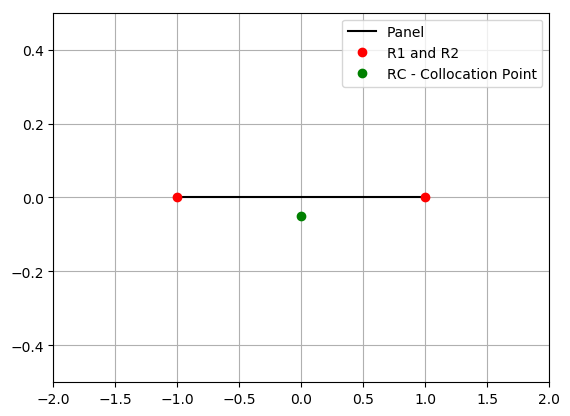

.0
  theta = 0.0


In [3]:
R1 = [-1.0, 0.0]
R2 = [1.0, 0.0]

# Additional optional argument for Panel2D
orient = "CW"           # Panel orientation
rC_loc = 0.50           # Location along panel of collocation point. Default is 0.50
rC_off = 0.05           # Larger offset to better see the offset. Default is 0.01

pan = PM2D.Panel2D(R1,R2,rC_location=rC_loc,rC_offset=rC_off,orientation=orient)

println("Contents of pan:")
println("  R1 = ",pan.r1)
println("  R2 = ",pan.r2)
println("  RC = ",pan.rC)
println("  t_hat = ",pan.t_hat)
println("  n_hat = ",pan.n_hat)
println("  L = ",pan.L)
println("  theta = ",pan.theta)
pause(0.5)

plot([pan.r1[1],pan.r2[1]],[pan.r1[2],pan.r2[2]],"black")
plot([pan.r1[1],pan.r2[1]],[pan.r1[2],pan.r2[2]],"or")
plot([pan.rC[1]],[pan.rC[2]],"og")
xlim(-2,2)
ylim(-.5,.5)
grid(true)
legend(["Panel","R1 and R2","RC - Collocation Point"]);

Contents of panel 1:
  R1 = [1.0, 0.0]
  R2 = [0.0, 1.0]
  RC = [0.500071, 0.500071]
  t_hat = [-0.707107, 0.707107]
  n_hat = [0.707107, 0.707107]
  L = 1.4142135623730951
  theta = 2.356194490192345
Contents of panel 2:

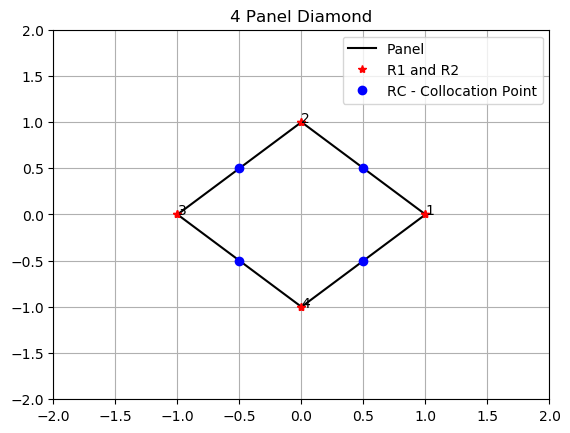


  R1 = [0.0, 1.0]
  R2 = [-1.0, 0.0]
  RC = [-0.500071, 0.500071]
  t_hat = [-0.707107, -0.707107]
  n_hat = [-0.707107, 0.707107]
  L = 1.4142135623730951
  theta = -2.356194490192345
Contents of panel 3:
  R1 = [-1.0, 0.0]
  R2 = [0.0, -1.0]
  RC = [-0.500071, -0.500071]
  t_hat = [0.707107, -0.707107]
  n_hat = [-0.707107, -0.707107]
  L = 1.4142135623730951
  theta = -0.7853981633974483
Contents of panel 4:
  R1 = [0.0, -1.0]
  R2 = [1.0, 0.0]
  RC = [0.500071, -0.500071]
  t_hat = [0.707107, 0.707107]
  n_hat = [0.707107, -0.707107]
  L = 1.4142135623730951
  theta = 0.7853981633974483


In [4]:
# Define diamond verticies in a CCW orientation
orientation = "CCW"
if orientation == "CW"
    X = [1.0 0.0 -1.0 0.0]
    Y = [0.0 -1.0 0.0 1.0]
elseif orientation == "CCW"
    X = [1.0 0.0 -1.0 0.0 1.0]
    Y = [0.0 1.0 0.0 -1.0 0.0]
end

# NOTE: The optional argument for Panel2D 'orientation' describes the orientation of the body of panels.
#       It determines the sign of the tangent vector to correctly determine the direction of the normal. The
#       default is "CCW" meaning counter-clockwise

# Additional optional argument for Panel2D
rC_loc = 0.50           # Location along panel of collocation point. Default is 0.50
rC_off = 1e-4             # Larger offset to better see the offset. Default is 0.01

panels = PM2D.NACA_body(X,Y,orientation=orientation,rC_location=rC_loc,rC_offset=rC_off)

NPAN = length(panels)

for j=1:NPAN
    println("Contents of panel ",j,":")
    println("  R1 = ",panels[j].r1)
    println("  R2 = ",panels[j].r2)
    println("  RC = ",panels[j].rC)
    println("  t_hat = ",panels[j].t_hat)
    println("  n_hat = ",panels[j].n_hat)
    println("  L = ",panels[j].L)
    println("  theta = ",panels[j].theta)
    
    plot([panels[j].r1[1],panels[j].r2[1]],[panels[j].r1[2],panels[j].r2[2]],"black")
    plot([panels[j].r1[1],panels[j].r2[1]],[panels[j].r1[2],panels[j].r2[2]],"*r")
    plot([panels[j].rC[1]],[panels[j].rC[2]],"ob")
    text(panels[j].r1[1],panels[j].r1[2],string(j))
    title("4 Panel Diamond")
    xlim(-2,2)
    ylim(-2,2)
    grid(true)
    legend(["Panel","R1 and R2","RC - Collocation Point"])
end

### CalcVelocity Function

All velocities are calculated based on constant strength source and vortex elements.

In [5]:
? PM2D.CalcVelocity

```
`CalcVelocity(elem_panel,eval_pt,str,panel_type)`
```

Computes the induced velocity from the element panel. Uses a constant strength distribution of either source, vortex, or doublet panels. Used as the velocity kernal for the panel method by allowing the strength to be of unit magnitude.

# ARGUMENTS

  * `elem_panel::Panel2D`         : Panel2D object of the element panel
  * `eval_pt::Array{Float64}`     : Point where the velocity field is evaluated
  * `str::Float64`                : Element strength
  * `panel_type::String`          : Type of panel ("source", "vortex", "doublet")

# OUTPUTS

  * `velocity::Array{Float64}`    : Vector of velocity [Vx,Vy]


In [6]:
# Create panel points
R1 = [-1.0, 0.0]
R2 = [1.0, 0.0]

# Create panel
pan1 = PM2D.Panel2D(R1,R2)

# Velocity Function
unit_str = 1.0
panel_type = "source"

function u_wrap(X)
    u = vcat(PM2D.CalcVelocity(pan1,X,unit_str,panel_type),0)
    return(u)
end

# Visualize results
line = [vcat(R1[1],R1[2],0.0), vcat(R2[1],R2[2],0.0)]
lines = [line]
points, vtk_lines, vtk_values = vtk.lines2vtk(lines)
vtk.generateVTK("line", points; lines=vtk_lines)

P_min = [-2,-2]
P_max = -P_min
NDIVS = [99,99]
ugrid = vtk.Grid(P_min, P_max, NDIVS)

vtk.calculate_field(ugrid, u_wrap, "U", "vector")
vtk.save(ugrid, "mygrid")

#run(`paraview --data="mygrid.vtk;line.vtk"`)

<img src="Pics/source_pan_verify.png" />

<img src="Pics/vortex_pan_verify.png" />

These are horizontal panels. In the past, issues have risen from rotating the panel. A transformation between global and panel coordinates is requied as follows. A panel at global coordinates $\textbf{r} = (x,y)$ is translated by $\textbf{r}_1$ (the starting point of a panel) to the origin. It is than rotated clockwise using the rotation matrix

\begin{equation*}
T(\theta) = 
\begin{bmatrix}
cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)
\end{bmatrix}
\end{equation*}

After transforming the coordinates into panel coordinates, the velocity is calculated and than rotated back counter-clockwise (a negative $\theta$) into the global coordaintes.

Results are as follows:

In [7]:
# Create 2 random points for panel
RN = [0. 0. 0. 0.]
for i=1:4
    if bitrand(1)[1]
        RN[i] = rand(1)[1]
    else
        RN[i] = -rand(1)[1]
    end
end
R1 = RN[1:2]
R2 = RN[3:4]

println("  R1 = ",R1)
println("  R2 = ",R2)

# Create the panel
pan1 = PM2D.Panel2D(R1,R2)

# Velocity Function
unit_str = 1.0
panel_type = "source"

function u_wrap(X)
    u = vcat(PM2D.CalcVelocity(pan1,X,unit_str,panel_type),0)
    return(u)
end

# Visualize results
line = [vcat(R1[1],R1[2],0.0), vcat(R2[1],R2[2],0.0)]
lines = [line]
points, vtk_lines, vtk_values = vtk.lines2vtk(lines)
vtk.generateVTK("line", points; lines=vtk_lines)

P_min = [-2,-2]
P_max = -P_min
NDIVS = [99,99]
ugrid = vtk.Grid(P_min, P_max, NDIVS)

vtk.calculate_field(ugrid, u_wrap, "U", "vector")
vtk.save(ugrid, "mygrid")

#run(`paraview --data="mygrid.vtk;line.vtk"`)

  R1 = [-0.238589, -0.00925315]
  R2 = [-0.233165, 0.315112]


<img src="Pics/rotated_source_pan_verify.png" />

### CalcStrengths and NACA Functions

The panel method is implemented through the use of the CalcStrengths function. CalcStrengths uses an array of Panel2D objects and the operation conditions to determine the element strengths for the boundary conditions. The various NACA functions can be used to create a NACA 4 digit series and than create an array of panels. In addition, the NACA_body function will take a list of X and Y coordinates for any closed body (closed meaning the first point must also be the last point) and also create an array of panels for use in the panel method.

In [8]:
? PM2D.NACA_airfoil

```
`NACA_airfoil(numb, N, c)`
```

NACA Four-Digit Series Airfoil. Returns two lists of ordered pairs representing a NACA Four-Digit Airfoil.

# ARGUMENTS

  * `numb::String`     : Four digit series. Symmetric airfoil given by "00xx"
  * `N::Int64`         : Number of points
  * `c::Float64=1.0`   : Length of airfoil. Defaults to 1.0 for appropiate scaling


In [9]:
? PM2D.NACA_body

```
`NACA_body(X,Y,orientation,r0_location,rC_location,rC_offset,refine_TE)`
```

Creates an array of Panel2D objects based on a closed body given by a set of X and Y points. Can be in either clockwise of counterclockwise orientations but must be a closed, continuous body.

# ARGUMENTS

  * `X::Array{Float64}`           : List of X body points
  * `Y::Array{Float64}`           : List of Y body points
  * `orientation::String="CCW"`   : Panel orientation; either "CCW" or "CW"
  * `rC_location::Float64=0.5`    : Location along panel (between 0 and 1) of collocation point
  * `rC_offset::Float64=0.01`     : Offset of collocation point from panel in direction of normal vector
  * `refine_TE::Bool=false`       : Option to place collocation points of trailing edges closer to trailing edge

# OUTPUTS

  * `panels::Array{Panel2D}`      : Array of Panel2D objects representing a body


In [10]:
? PM2D.CalcStrengths

```
`CalcStrengths(panels,oper_cond)`
```

Given a list of Panel2D objects and the operation conditions, calculates the strengths of the elements. Implements a Hans-Smith panel method. The Hans-Smith method uses a distribution of constant strength source panels with varying strengths for each panel and a constant strength vortex distribution across the entire body. This allows for easy implementation of the Kutta Condition.

# ARGUMENTS

  * `panels::Array{Panel2D}`       : Array of Panel2D objects representing a body
  * `oper_cond::Array{Float64}`    : Operation conditions, [U_INF,ALPHA]

# OUTPUTS

  * `A::Array{Float64}`            : Coefficient matrix, size: (N+1)x(N+1)
  * `b::Array{Float64}`            : RHS vector
  * `strengths::Array{Float64}`    : Array of element strengths


In [21]:
# Define verticies for diamond (MUST BE A CLOSED BODY)
X = [1.0 0.0 -1.0 0.0 1.0]
Y = [0.0 1.0 0.0 -1.0 0.0]

# Arguments for Panel2D
rC_location = 0.50      # Collocation point at half panel
rC_offset = 1e-4        # Collocation point offset in normal direction
orientation = "CCW"     # Body orientation

panels = PM2D.NACA_body(X,Y,orientation=orientation,rC_location=rC_location,rC_offset=rC_offset)

NPAN = length(panels)

# Operation conditions
U_INF = 10.0
AoA = 0
oper_cond = [U_INF,AoA]
u_inf = PM2D.unpack_oper_cond(oper_cond)

# Calculate the strengths (Panel Method)
A,b,strengths = PM2D.CalcStrengths(panels,oper_cond)

println(" -- Printing Results...")
println("COEF MATRIX A = ")
println(A[:,1])
println(A[:,2])
println(A[:,3])
println(A[:,4])
println(A[:,5])

println("RHS VECTOR B = ")
println(b)

println("STRENGTHS VECTOR = ")
println(strengths)

for n=1:NPAN
    eval_pt = panels[n].rC-(0.0).*panels[n].n_hat
    u_ind = u_inf + PM2D.InducedVelocity(panels,
                                 strengths,
                                 eval_pt)
    println("INDUCED VELOCITY @ PANEL ",n," = ",u_ind)
    println("  EVAL_PT = ",eval_pt)
end

function wrap_u(X)
    u = PM2D.InducedVelocity(panels,
                             strengths,
                             X[1:2])

    return vcat(u + u_inf,0)
end

run_PV = true
if run_PV
    using VTKtools; vtk = VTKtools
    line = [[X[1], Y[1], 0.0],
            [X[2], Y[2], 0.0],
            [X[3], Y[3], 0.0],
            [X[4], Y[4], 0.0],
            [X[1], Y[1], 0.0]]
    lines = [line]
    points, vtk_lines, vtk_values = vtk.lines2vtk(lines)
    vtk.generateVTK("diamond", points; lines=vtk_lines)

    P_min = [-3.0,-3.0]
    P_max = -P_min
    NDIVS = [100,100]
    fgrid = vtk.Grid(P_min, P_max, NDIVS)

    vtk.calculate_field(fgrid, wrap_u, "U", "vector")
    vtk.save(fgrid, "mygrid")


    #run(`paraview --data="mygrid.vtk;diamond.vtk"`)
end

 -- Printing Results...
COEF MATRIX A = 
[0.499955, 0.128084, 0.147575, 0.128084, -0.17619]
[0.128084, 0.499955, 0.128084, 0.147575, -0.17619]
[0.147575, 0.128084, 0.499955, 0.128084, 0.17619]
[0.128084, 0.147575, 0.128084, 0.499955, 0.17619]
[5.55112e-17, 2.22045e-16, 1.11022e-16, 0.0, -1.8074]
RHS VECTOR B = 
[-7.07107, 7.07107, 7.07107, -7.07107, -0.0]
STRENGTHS VECTOR = 
[-20.0666, 20.0666, 20.0666, -20.0666, 1.96565e-15]
INDUCED VELOCITY @ PANEL 1 = [10.0, -10.0]
  EVAL_PT = [0.500071, 0.500071]
INDUCED VELOCITY @ PANEL 2 = [10.0, 10.0]
  EVAL_PT = [-0.500071, 0.500071]
INDUCED VELOCITY @ PANEL 3 = [10.0, -10.0]
  EVAL_PT = [-0.500071, -0.500071]
INDUCED VELOCITY @ PANEL 4 = [10.0, 10.0]
  EVAL_PT = [0.500071, -0.500071]


<img src="Pics/diamond_flow.png" />

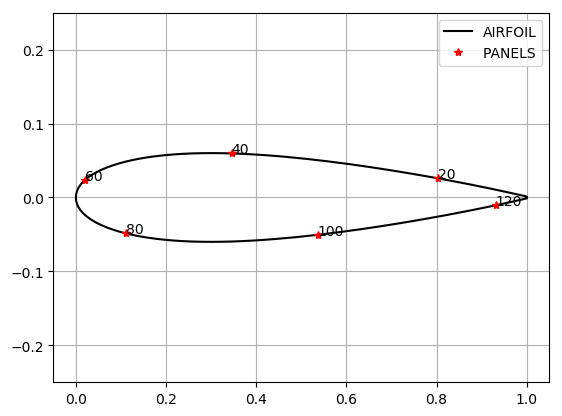

In [12]:
file_name = "PM2D/data/naca0012.txt"
XY = PM2D.readcontour(file_name, path=pwd(), output="matrix")

# Operation conditions
U_INF = 10.0
AoA = 0
oper_cond = [U_INF,AoA]
u_inf = PM2D.unpack_oper_cond(oper_cond)

# Arguments for Panel2D
r0_location = 0.25      # Filler, not used in constant strength panel method
rC_location = 0.50      # Collocation point at half panel
rC_offset = 1e-6        # Collocation point offset in normal direction
orientation = "CCW"      # Body orientation

panels = PM2D.NACA_body(XY[:,1],XY[:,2],orientation=orientation,rC_location=rC_location,rC_offset=rC_offset)
A,b,strengths = PM2D.CalcStrengths(panels,oper_cond)
NPAN = length(panels)

plot(XY[:,1],XY[:,2],"black")
for n=1:NPAN
    if n%20 == 0
        plot(panels[n].r1[1],panels[n].r1[2],"*r")
        text(panels[n].r1[1],panels[n].r1[2],string(n))
    end
end
legend(["AIRFOIL","PANELS"])
# xlim(0.6,0.8)
# ylim(-0.1,0.1)
ylim(-.25,.25)
grid(true)

run_PV = false
if run_PV
    XYZ = hcat(XY[:,1],XY[:,2],zeros(NPAN+1))
    line = PM2D.array_to_matrix(XYZ)
    lines = [line]
    points, vtk_lines, vtk_values = vtk.lines2vtk(lines)
    vtk.generateVTK("airfoil", points; lines=vtk_lines)

    function wrap_u(X)
        method = "HansSmith"
        order = "constant"

        u = PM2D.InducedVelocity(panels,
                                 strengths,
                                 oper_cond,
                                 X[1:2])

        return vcat(u+u_inf,0)
    end

    P_min = [-.5,-.4]
    P_max = [1.5,.4]
    NDIVS = [400,200]
    fgrid = vtk.Grid(P_min, P_max, NDIVS)

    vtk.calculate_field(fgrid, wrap_u, "U", "vector")
    vtk.save(fgrid, "mygrid")

    #run(`paraview --data="mygrid.vtk;airfoil.vtk"`)
end

<img src="Pics/NACA0012_U.PNG" />

Below is a visualization of the velocity field of the same NACA 0012 Airfoil at an angle of attack of 10:

<img src="Pics/NACA0012_U_AoA10.PNG" />

### CalcCp and CalcCl Functions

After calculated the element strengths through the panel method, secondary calculations such as velocity fields and pressure and lift coefficients can be calculated. Using the InducedVelocity function, which calculates the velocity at a determined point based on the element strengths, the CalcCp and CalcCl functions determine the coefficients.

In [13]:
? PM2D.InducedVelocity

```
`InducedVelocity(panels,strengths,R)`
```

Given a body of panels, computes the induced velocity from all of the panels. Uses a Hess-Smith style of element distribution.

# ARGUMENTS

  * `panels::Array{Panel2D}`          : Array of Panel2D objects representing a body
  * `strengths::Array{Float64}`       : Array of element strengths
  * `R::Array{Float64}`               : Evaluation point

# OUTPUTS

  * `u_ind::Array{Float64}`           : Vector of induced velocity


In [14]:
? PM2D.CalcCp

```
`CalcCp(panels,strengths,oper_cond)`
```

Computes the coefficient of pressure at each collocation point of panels.

# ARGUMENTS

  * `panels::Array{Panel2D}`        : Array of Panel2D objects representing a body
  * `strengths::Array{Float64}`     : Array of element strengths
  * `oper_cond::Array{Float64}`     : Operation conditions, [U_INF,ALPHA]

# OUTPUTS

  * `Cp::Array{Float64}`            : Array of pressure coefficients at each collocation point
  * `rC::Array{Float64}`            : Array of points corresponding to where Cp was calculated


In [15]:
? PM2D.CalcCl

```
`CalcCl(panels,strengths,oper_cond)`
```

Computes the coefficient of lift over the entire body.

# ARGUMENTS

  * `panels::Array{Panel2D}`        : Array of Panel2D objects representing a body
  * `strengths::Array{Float64}`     : Array of element strengths
  * `oper_cond::Array{Float64}`     : Operation conditions, [U_INF,ALPHA]

# OUTPUTS

  * `Cl::Float64`                   : Coefficient of lift


Below are some validation cases for the NACA 0012 Airfoil. Presented below are Coefficient of Pressure graphs at different angle of attack as well as a Coefficient of Lift graph. Data reported is from NASA's Langley Research Center's Turbluence Modeling Resource. Experimental data was aquired for different configurations and the data presented is to validate a model against experiement data. The experiments differ fundamentally from the results presented here as they account for turbulence and viscid flow, while the panel method assumes inviscid flow.

Some error is to be expected towards the trailing edge of the airfoil.

A boundary layer coupling with the panel method is currently in development.

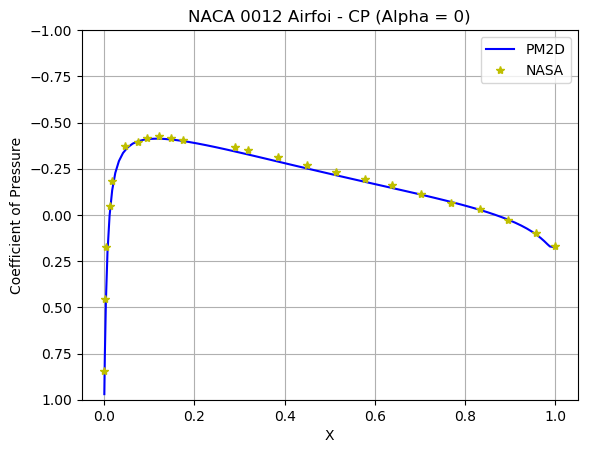

In [16]:
Cp,rC = PM2D.CalcCp(panels,strengths,oper_cond)
Cp_up = Cp[1:Int(NPAN/2)]
rC_up = rC[1:Int(NPAN/2),1]
Cp_low = Cp[Int(NPAN/2)+1:NPAN-3]
rC_low = rC[Int(NPAN/2)+1:NPAN-3,1]
# plot(rC[:,1],Cp,"b")
plot(rC_low,Cp_low,"b")

raw_data = CSV.read("CP_NASA.csv")
plot(raw_data[1],raw_data[2],"y*")

# plot(XY[:,1],XY[:,2],"black")
legend(["PM2D","NASA"])
ylim(1.0,-1.0)
xlabel("X")
ylabel("Coefficient of Pressure")
grid(true)
title("NACA 0012 Airfoi - CP (Alpha = 0)");

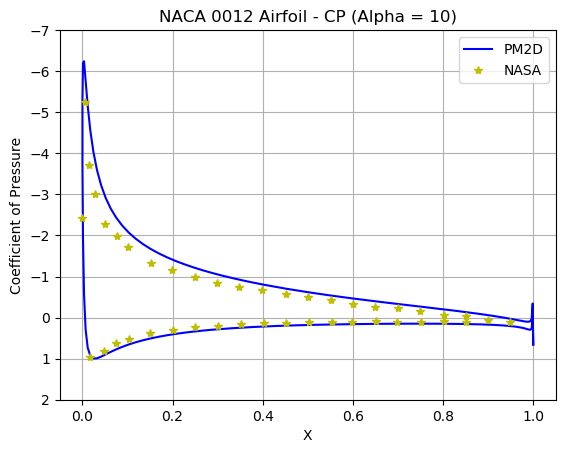

In [17]:
U_INF = 10.0
AoA = 10
oper_cond = [U_INF,AoA]

# Arguments for Panel2D
rC_location = 0.50      # Collocation point at half panel
rC_offset = 1e-6       # Collocation point offset in normal direction
orientation = "CCW"      # Body orientation

panels = PM2D.NACA_body(XY[:,1],XY[:,2],orientation=orientation,rC_location=rC_location,rC_offset=rC_offset)
A,b,strengths = PM2D.CalcStrengths(panels,oper_cond)

Cp,rC = PM2D.CalcCp(panels,strengths,oper_cond)
plot(rC[:,1],Cp,"b")
# Cp_up = Cp[1:Int(NPAN/2)]
# rC_up = rC[1:Int(NPAN/2),1]
# Cp_low = Cp[Int(NPAN/2)+1:NPAN]
# rC_low = rC[Int(NPAN/2)+1:NPAN,1]
# plot(rC_low,Cp_low,"r")
# plot(rC_up,Cp_up,"g")

raw_data = CSV.read("NASA_CP_A10.csv")
plot(raw_data[1],raw_data[2],"y*")

# raw_data = CSV.read("XFOIL_NACA0012_AoA10.csv")
# plot(raw_data[1],raw_data[2],"b*")

# plot(XY[:,1],XY[:,2],"black")
legend(["PM2D","NASA"])
ylim(2.0,-7.0)
xlabel("X")
ylabel("Coefficient of Pressure")
grid(true)
title("NACA 0012 Airfoil - CP (Alpha = 10)");

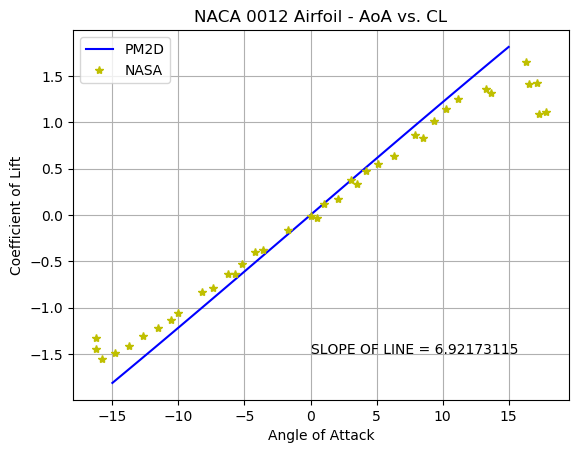

PyObject Text(0,-1.5,'SLOPE OF LINE = 6.92173115')

In [18]:
alpha_low = -15
alpha_high = 15
N = 30
d_alpha = (alpha_high - alpha_low)/(N - 1)
alpha = alpha_low:d_alpha:alpha_high
Cl = zeros(length(alpha))

for n=1:length(alpha)
    # Operation conditions
    U_INF = 10.0
    AoA = alpha[n]
    oper_cond = [U_INF,AoA]

    # Arguments for Panel2D
    rC_location = 0.50      # Collocation point at half panel
    rC_offset = 0.001        # Collocation point offset in normal direction
    orientation = "CCW"      # Body orientation

    panels = PM2D.NACA_body(XY[:,1],XY[:,2],orientation=orientation,rC_location=rC_location,rC_offset=rC_offset)
    A,b,strengths = PM2D.CalcStrengths(panels,oper_cond)
    
    Cl[n] = PM2D.CalcCl(panels,strengths,oper_cond)
end

raw_data = CSV.read("NASA_CL.csv")

plot(alpha,Cl,"b")
plot(raw_data[1],raw_data[2],"y*")
title("NACA 0012 Airfoil - AoA vs. CL")
xlabel("Angle of Attack")
ylabel("Coefficient of Lift")
legend(["PM2D","NASA"])
grid(true)

slope = ((Cl[length(alpha)] - Cl[1])/(pi/180))/(alpha[length(alpha)] - alpha[1])
text(0,-1.5,"SLOPE OF LINE = "*string(round(slope,8)))